# **Visualize our dataset in many ways** 

In [1]:
!pip install pandas matplotlib seaborn wordcloud


### load the CSV file and plot each party in %.

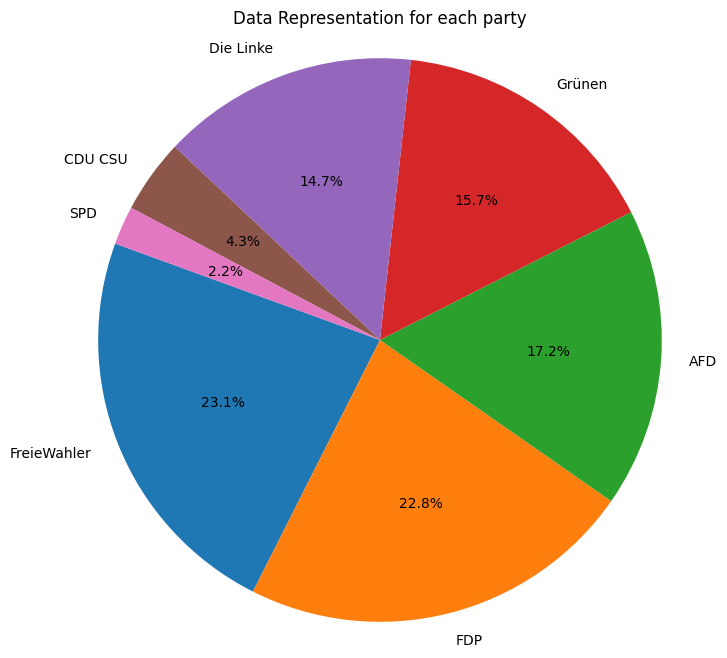

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Daten.csv')

parties = df['Partei'].value_counts()
party_proz = parties / parties.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(party_proz, labels=party_proz.index, autopct='%1.1f%%', startangle=160)
plt.title("Data Representation for each party")
plt.axis('equal')
plt.show()


##  Visualize most common words using word cloud Lib.

###  Word Cloud for Meinung

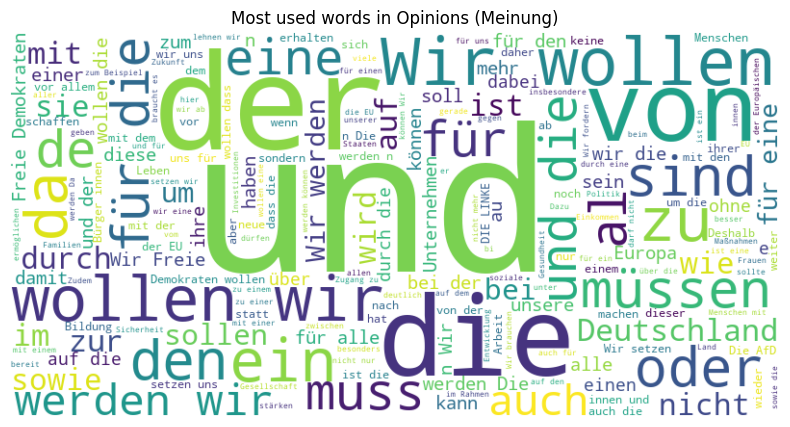

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

t_meinung = " ".join(meinung for meinung in df['Meinung'].dropna())
wc_meinung = WordCloud(width=800, height=400, background_color='white').generate(t_meinung)

plt.figure(figsize=(10, 5))
plt.imshow(wc_meinung, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words in Opinions (Meinung)")
plt.show()


### Word Cloud for Thema

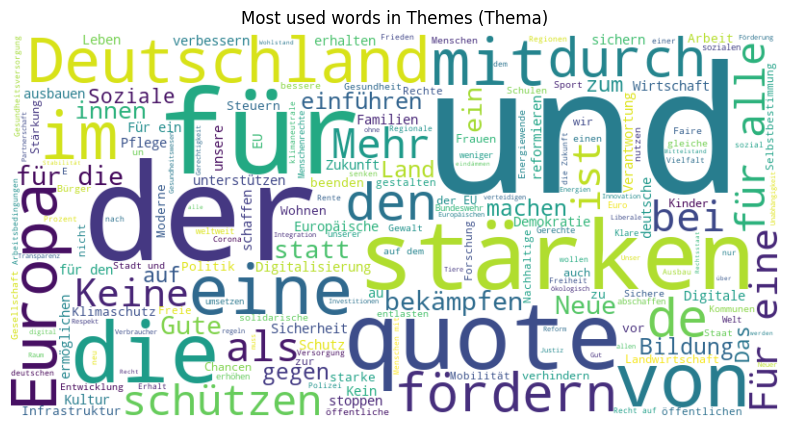

In [6]:
te_thema = " ".join(thema for thema in df['Thema'].dropna())
wc_thema = WordCloud(width=800, height=400, background_color='white').generate(te_thema)

plt.figure(figsize=(10, 5))
plt.imshow(wc_thema, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words in Themes (Thema)")
plt.show()

## Plot Word Length (Meinung) - Cause It contains of very long texts

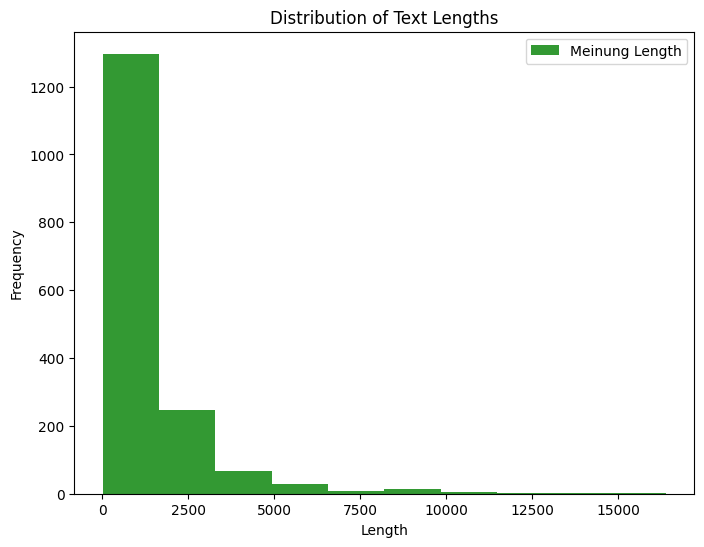

In [3]:
df['Meinung_Length'] = df['Meinung'].dropna().apply(len)

plt.figure(figsize=(8, 6))
plt.hist(df['Meinung_Length'], bins=10, alpha=0.8, label='Meinung Length', color='green')
plt.title("Distribution of Text Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()
